<a href="https://colab.research.google.com/github/2303A52106/AIML_2303A52106/blob/main/AIML_LAB_EXAM_2303A52106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Apply KNN on a classification dataset with k=3 and evaluate its accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [4]:
file_path = '/content/drive/MyDrive/loan_data.csv'
data = pd.read_csv(file_path)


In [5]:
print(data.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [6]:
data = data.dropna()


In [7]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [8]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


2. Visualize the decision boundary for KNN with k=3.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


In [15]:
file_path = '/content/drive/MyDrive/loan_data.csv'
data = pd.read_csv(file_path)

In [16]:
data = data.dropna()

In [17]:
le = LabelEncoder()
data['loan_intent'] = le.fit_transform(data['loan_intent'])

In [18]:
features = ['loan_amnt', 'loan_int_rate']
X = data[features]
y = data['loan_status']

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
h = .02

In [23]:
!pip install matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [24]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [25]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

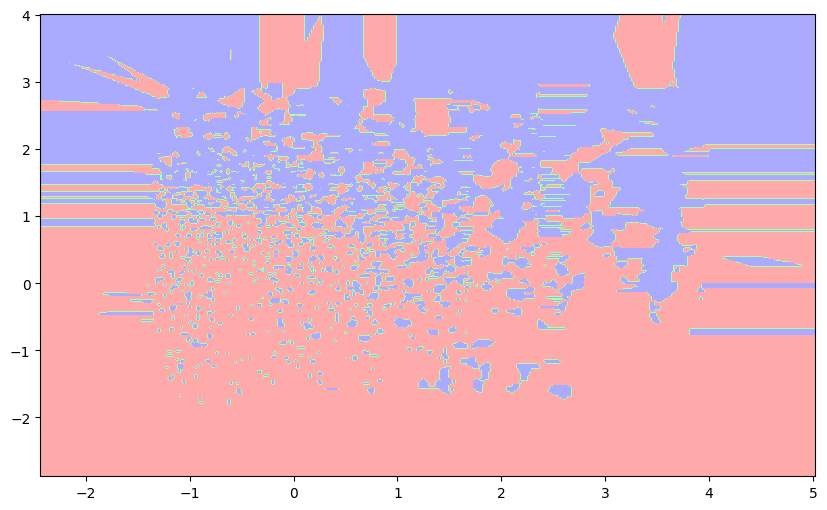

In [26]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)


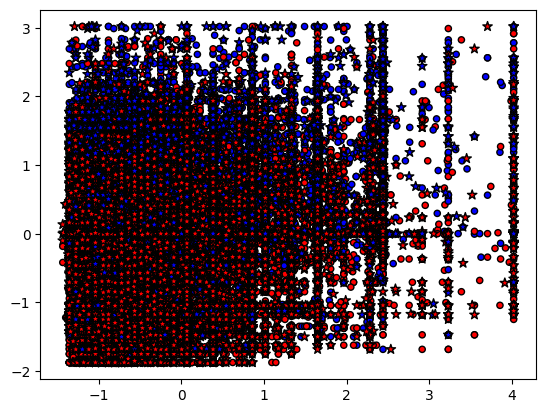

In [27]:
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, marker='*')


Text(0.5, 1.0, '3-Class classification (k = 3)')

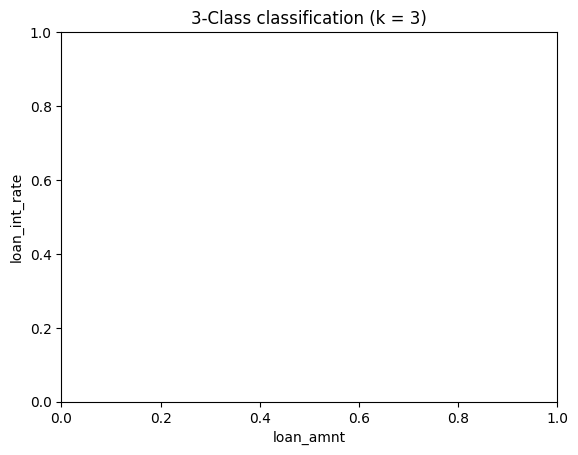

In [28]:
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("3-Class classification (k = 3)")

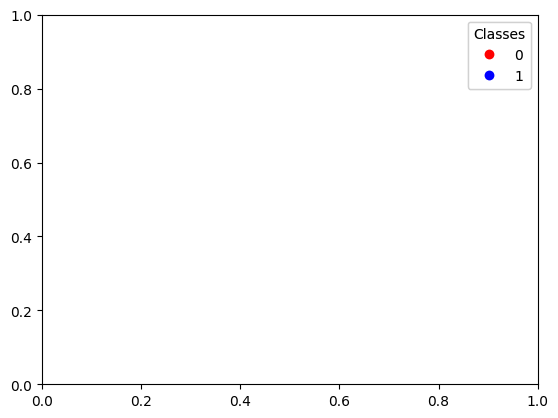

In [29]:
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.show()

3. Split the dataset into training and testing sets and compute the confusion
matrix.

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
file_path = '/content/drive/MyDrive/loan_data.csv'
data = pd.read_csv(file_path)

In [67]:
# Encode categorical data
X = pd.get_dummies(X, drop_first=True)

In [69]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
# Import the LogisticRegression class
from sklearn.linear_model import LogisticRegression

# Instantiate the model with the correct name
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [77]:
y_pred = model.predict(X_test)

In [43]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [44]:
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[9776  717]
 [ 863 2144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10493
           1       0.75      0.71      0.73      3007

    accuracy                           0.88     13500
   macro avg       0.83      0.82      0.83     13500
weighted avg       0.88      0.88      0.88     13500



4. Compare the performance of KNN with and without feature scaling.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [46]:
file_path = '/content/drive/MyDrive/loan_data.csv'
data = pd.read_csv(file_path)

In [47]:
df = pd.DataFrame(data)

In [48]:

X = df[['person_age', 'person_income']]
y = df['loan_status']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
### KNN Without Scaling
knn_raw = KNeighborsClassifier(n_neighbors=3)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)

In [51]:
print("KNN Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_raw))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_raw))
print("Classification Report:\n", classification_report(y_test, y_pred_raw))


KNN Without Scaling:
Accuracy: 0.7542962962962962
Confusion Matrix:
 [[9215 1278]
 [2039  968]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     10493
           1       0.43      0.32      0.37      3007

    accuracy                           0.75     13500
   macro avg       0.62      0.60      0.61     13500
weighted avg       0.73      0.75      0.74     13500



In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [53]:

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [55]:
print("\nKNN With Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))


KNN With Scaling:
Accuracy: 0.7592592592592593
Confusion Matrix:
 [[9285 1208]
 [2042  965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     10493
           1       0.44      0.32      0.37      3007

    accuracy                           0.76     13500
   macro avg       0.63      0.60      0.61     13500
weighted avg       0.74      0.76      0.74     13500



5. Tune the value of k (e.g., test with k=5) and compare performance.

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [57]:
file_path = '//content/drive/MyDrive/loan_data.csv'
data = pd.read_csv(file_path)

In [58]:
df = pd.DataFrame(data)

In [59]:
X = df[['person_age', 'person_income']]
y = df['loan_status']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

In [63]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"\nPerformance for k={k}:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Performance for k=1:
Accuracy: 0.7231111111111111
Confusion Matrix:
 [[8637 1856]
 [1882 1125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82     10493
           1       0.38      0.37      0.38      3007

    accuracy                           0.72     13500
   macro avg       0.60      0.60      0.60     13500
weighted avg       0.72      0.72      0.72     13500


Performance for k=3:
Accuracy: 0.7592592592592593
Confusion Matrix:
 [[9285 1208]
 [2042  965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85     10493
           1       0.44      0.32      0.37      3007

    accuracy                           0.76     13500
   macro avg       0.63      0.60      0.61     13500
weighted avg       0.74      0.76      0.74     13500


Performance for k=5:
Accuracy: 0.7736296296296297
Confusion Matrix:
 [[9520  973]
 [2083  924]]
Classif

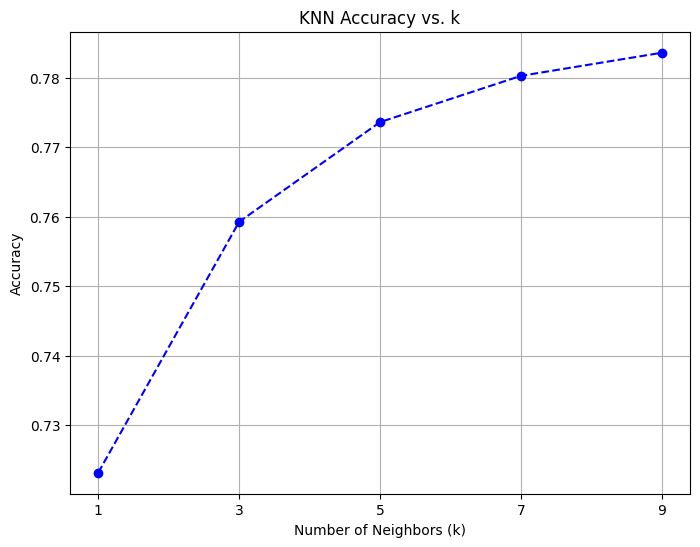

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title("KNN Accuracy vs. k")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid()
plt.show()